In [148]:
#Import Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,roc_curve, auc,classification_report, roc_auc_score
from sklearn.decomposition import PCA
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read in CDC DataFrame
cdc_df = pd.read_sas('LLCP2021.XPT') 
cdc_df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000002',2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000003',2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,1.0,1.0,b'01172021',b'01',b'17',b'2021',1100.0,b'2021000004',2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,1.0,b'01152021',b'01',b'15',b'2021',1100.0,b'2021000005',2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438688,78.0,12.0,b'01062022',b'01',b'06',b'2022',1100.0,b'2021001381',2.021001e+09,NaN,...,1.0,1.0,157.0,393.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438689,78.0,12.0,b'01122022',b'01',b'12',b'2022',1100.0,b'2021001382',2.021001e+09,NaN,...,1.0,1.0,200.0,157.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438690,78.0,12.0,b'12212021',b'12',b'21',b'2021',1100.0,b'2021001383',2.021001e+09,NaN,...,1.0,1.0,200.0,143.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438691,78.0,12.0,b'01112022',b'01',b'11',b'2022',1100.0,b'2021001384',2.021001e+09,NaN,...,1.0,1.0,100.0,156.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [3]:
cdc_df.to_csv('cdc_survey.csv')

In [5]:
#remove columns that have more to do with survey related questions
first_clean_df = cdc_df.drop(columns=['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENM1',
 'PVTRESD1',
 'COLGHOUS',
 'STATERE1',
 'CELPHON1',
 'LADULT1',
 'COLGSEX',
 'NUMADULT',
 'LANDSEX',
 'NUMMEN',
 'NUMWOMEN',
 'RESPSLCT',
 'SAFETIME',
 'CTELNUM1',
 'CELLFON5',
 'CADULT1',
 'CELLSEX',
 'PVTRESD3',
 'CCLGHOUS',
 'CSTATE1',
 'LANDLINE',
 'HHADULT',
 'NUMHHOL3',
 'NUMPHON3',
 'RENTHOM1'])

In [86]:
#from reading documentation about the dataset, we know that any columns with an underscore in it is a calculated column, and we want to only look at variables that were collected in the survey
uncalculated_columns = [x for x in first_clean_df.columns if '_' not in x]
len(uncalculated_columns)

192

In [9]:
for x in uncalculated_columns:
    if len(str(first_clean_df[x].max())) > 7:
        print(x, len(str(first_clean_df[x].max())))

FLSHTMY3 8
HIVTSTD3 8


In [65]:
second_clean_df = first_clean_df.copy()

In [72]:
null_df = (second_clean_df.isnull().sum() / second_clean_df.shape[0] * 100).to_frame()


,0
SEXVAR,0.000000
GENHLTH,0.000912
PHYSHLTH,0.000684
MENTHLTH,0.000456
POORHLTH,46.793316


In [82]:
null_df.sort_values(by=0, ascending=False)
null_df

,0
SEXVAR,0.000000
GENHLTH,0.000912
PHYSHLTH,0.000684
MENTHLTH,0.000456
POORHLTH,46.793316
...,...
_VEGLT1A,0.000000
_FRT16A,0.000000
_VEG23A,0.000000
_FRUITE1,0.000000


In [87]:
#filling NA values with the digit specific number of 9's (from the documentation we know that 9 is a refused to answer, which is as close to a null as we can get in the data to run any kind of analysis)
for x in uncalculated_columns:
    if len(str(second_clean_df[x].max())) == 3:
        second_clean_df[x] = second_clean_df[x].fillna(9.0)
    elif len(str(second_clean_df[x].max())) == 4:
        second_clean_df[x] = second_clean_df[x].fillna(99.0)
    elif len(str(second_clean_df[x].max())) == 5:
        second_clean_df[x] = second_clean_df[x].fillna(999.0)
    elif len(str(second_clean_df[x].max())) == 6:
        second_clean_df[x] = second_clean_df[x].fillna(9999.0)
    elif len(str(second_clean_df[x].max())) == 7:
        second_clean_df[x] = second_clean_df[x].fillna(99999.0)
    else:
        second_clean_df[x] = second_clean_df[x].fillna(999999.0)

In [13]:
second_clean_df.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,2.0,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,2.0,3.0,88.0,88.0,99.0,1.0,2.0,2.0,1.0,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,2.0,2.0,88.0,88.0,99.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,2.0,2.0,88.0,10.0,88.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,5.0,30.0,88.0,30.0,3.0,1.0,2.0,1.0,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [88]:
#create dataframe that only has collected variables, nothing that has been calculated 
only_survey_answers = second_clean_df[uncalculated_columns]
only_survey_answers.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,...,SOFEMALE,TRNSGNDR,QSTVER,QSTLANG,MSCODE,CAGEG,HTIN4,HTM4,WTKG3,DRNKANY5
0,2.0,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,...,9.0,9.0,10.0,1.0,1.0,9.0,59.0,150.0,3266.0,2.0
1,2.0,3.0,88.0,88.0,99.0,1.0,2.0,2.0,1.0,1.0,...,9.0,9.0,10.0,1.0,2.0,9.0,66.0,168.0,99999.0,2.0
2,2.0,2.0,88.0,88.0,99.0,2.0,2.0,2.0,1.0,2.0,...,9.0,9.0,10.0,1.0,1.0,9.0,65.0,165.0,7711.0,2.0
3,2.0,2.0,88.0,10.0,88.0,2.0,1.0,2.0,1.0,1.0,...,9.0,9.0,10.0,1.0,3.0,9.0,64.0,163.0,8845.0,1.0
4,1.0,5.0,30.0,88.0,30.0,3.0,1.0,2.0,1.0,1.0,...,9.0,9.0,10.0,1.0,2.0,9.0,71.0,180.0,9344.0,2.0


In [63]:
#instantiate RandomForestClassifer
rfc = RandomForestClassifier(n_estimators=500)

In [83]:
#create our features and target variables
X = second_clean_df.drop(columns='_MICHD')
y = second_clean_df['_MICHD']

In [84]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [85]:
#fit predict RFC model
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [75]:
#look at what features the model says are valuable to it's predictive qualities
sorted(zip(rfc.feature_importances_, X.columns), reverse=True)

[(0.10468761736565795, 'CVDINFR4'),
 (0.023642227228065547, 'WEIGHT2'),
 (0.023182352490233985, 'WTKG3'),
 (0.019701452060953705, 'GENHLTH'),
 (0.019026136604610316, 'CHOLMED3'),
 (0.018235600290019537, 'POTATOE1'),
 (0.018115816057845187, 'FVGREEN1'),
 (0.017720141077553323, 'INCOME3'),
 (0.017472820834290515, 'FRENCHF1'),
 (0.017453667178101904, 'HEIGHT3'),
 (0.017250374060279103, 'HTM4'),
 (0.01722170891034476, 'HTIN4'),
 (0.016911890482154662, 'FRUIT2'),
 (0.016814760370477373, 'VEGETAB2'),
 (0.01494954072150088, 'FLSHTMY3'),
 (0.014877738787855919, 'FRUITJU2'),
 (0.013642660711858112, 'PHYSHLTH'),
 (0.013286858735812314, 'EMPLOY1'),
 (0.013213668700210615, 'QSTVER'),
 (0.01282592858344408, 'POORHLTH'),
 (0.012644995793994297, 'JOINPAI2'),
 (0.012255790364167584, 'PRIMINSR'),
 (0.011975076683776165, 'EDUCA'),
 (0.011626212373820435, 'DIABAGE3'),
 (0.011367633441803995, 'MENTHLTH'),
 (0.011119942567053969, 'ALCDAY5'),
 (0.010844972281004962, 'MARITAL'),
 (0.01082897772928339, 'BPMED

0.9422561409267466
              precision    recall  f1-score   support

         1.0       0.67      0.12      0.20      5702
         2.0       0.94      1.00      0.97    102913
         7.0       1.00      0.01      0.01       983
         9.0       0.94      0.66      0.78        76

    accuracy                           0.94    109674
   macro avg       0.89      0.44      0.49    109674
weighted avg       0.93      0.94      0.92    109674



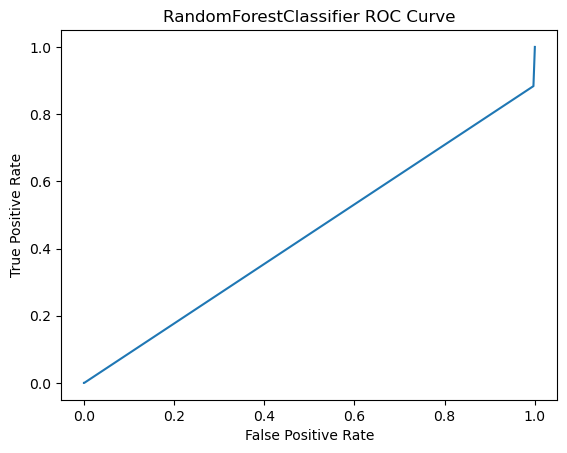

In [76]:
#look at evaluation of first pass
print(accuracy_score(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_predict, pos_label = 1.0)
plt.plot(false_positive_rate, true_positive_rate)
plt.title("RandomForestClassifier ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('cdc_data_roc_curve.png')

In [83]:
#set up scaling on data
cdc_scaler = StandardScaler()
X_scaler = cdc_scaler.fit(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled = X_scaler.transform(X_train)

In [84]:
#reinstantiate RFC for assessing scaled data
rfc_scaled = RandomForestClassifier(n_estimators=500)

In [85]:
#fit/predict the model on the scaled data
rfc_scaled.fit(X_train_scaled, y_train)
rfc_scaled_predict = rfc_scaled.predict(X_test_scaled)


In [86]:
#look at what features the model says are valuable to it's predictive qualities
sorted(zip(rfc_scaled.feature_importances_, X.columns), reverse=True)

[(0.10638397735075306, 'CVDINFR4'),
 (0.023511727997283162, 'WEIGHT2'),
 (0.02322843445055516, 'WTKG3'),
 (0.019359237253040475, 'GENHLTH'),
 (0.01915195875144347, 'CHOLMED3'),
 (0.018231729135417252, 'POTATOE1'),
 (0.018075660932830803, 'FVGREEN1'),
 (0.017719371456463524, 'INCOME3'),
 (0.017511495249014485, 'FRENCHF1'),
 (0.017412284148063745, 'HEIGHT3'),
 (0.017316429243132248, 'HTM4'),
 (0.017183057375114136, 'HTIN4'),
 (0.016881256650368368, 'FRUIT2'),
 (0.016816797695688186, 'VEGETAB2'),
 (0.014967528836436067, 'FLSHTMY3'),
 (0.014873677564975839, 'FRUITJU2'),
 (0.013637303821231303, 'PHYSHLTH'),
 (0.013142803292164896, 'QSTVER'),
 (0.012952222742716003, 'EMPLOY1'),
 (0.012887520338704831, 'POORHLTH'),
 (0.01256164332106464, 'JOINPAI2'),
 (0.012024915610859919, 'PRIMINSR'),
 (0.011940311190433626, 'EDUCA'),
 (0.011933860830248728, 'DIABAGE3'),
 (0.011377718743348222, 'MENTHLTH'),
 (0.011018238643160524, 'ALCDAY5'),
 (0.010842760763567766, 'MARITAL'),
 (0.01050625842834801, 'BPMED

0.9424293816218976
              precision    recall  f1-score   support

         1.0       0.67      0.12      0.20      5702
         2.0       0.94      1.00      0.97    102913
         7.0       1.00      0.01      0.01       983
         9.0       0.94      0.66      0.78        76

    accuracy                           0.94    109674
   macro avg       0.89      0.45      0.49    109674
weighted avg       0.93      0.94      0.92    109674



Text(0, 0.5, 'True Positive Rate')

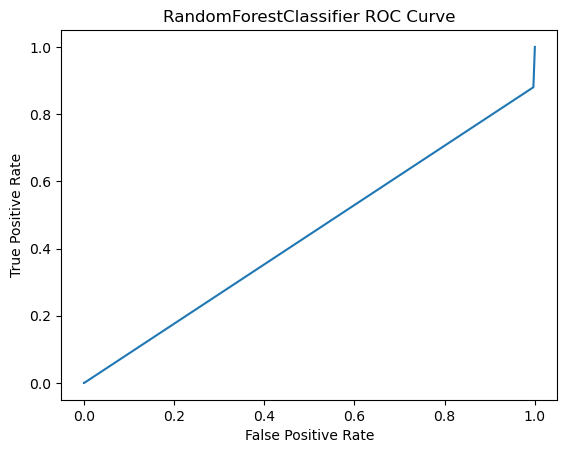

In [87]:
#look at results of scaled data
print(accuracy_score(y_test, rfc_scaled_predict))
print(classification_report(y_test, rfc_scaled_predict))
false_positive_rate_scaled, true_positive_rate_scaled, thresholds_scaled = roc_curve(y_test, rfc_scaled_predict, pos_label = 1.0)
plt.plot(false_positive_rate_scaled, true_positive_rate_scaled)
plt.title("RandomForestClassifier ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [9]:
heart_disease_df = pd.read_csv('framingham.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [80]:
#look at percentage of null values in each columns
heart_disease_df.isnull().sum()/heart_disease_df.shape[0]*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [28]:
#look at correlation statistics in data set
print("Pre Imputation Correlation")
print(heart_disease_df.corrwith(heart_disease_df['TenYearCHD'])*100)

Pre Imputation Correlation
male                 8.842757
age                 22.525610
currentSmoker        1.945627
cigsPerDay           5.788426
BPMeds               8.748858
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.218428
sysBP               21.642904
diaBP               14.529910
BMI                  7.519193
heartRate            2.291261
glucose             12.554400
TenYearCHD         100.000000
dtype: float64


In [12]:
#on such a small data set, it seems like it's reasonable to drop education entirely from our analysis as there is a low correlation against our target variable, as well as having a null value percentage that might be difficult to deal with safely
heart_disease_df = heart_disease_df.drop(columns='education')
heart_disease_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
#going to attempt to use KNNImputer to impute missing values for totChol, cigsPerDay, BPMeds, BMI, heartRate, and glucose
from sklearn.impute import KNNImputer

In [20]:
imputed_df = heart_disease_df.copy()

In [14]:
heart_disease_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
frame_imput = KNNImputer(n_neighbors=3)

In [24]:
new_columns = imputed_df.columns
new_columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [21]:
heart_disease_imputed_df = frame_imput.fit_transform(imputed_df)

In [25]:
heart_disease_imputed_df = pd.DataFrame(heart_disease_imputed_df, columns=new_columns)
heart_disease_imputed_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [26]:
heart_disease_imputed_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
print("Post KNNImputation Correlation")
print(heart_disease_imputed_df.corrwith(heart_disease_imputed_df['TenYearCHD'])*100)

Post KNNImputation Correlation
male                 8.842757
age                 22.525610
currentSmoker        1.945627
cigsPerDay           5.757526
BPMeds               9.022666
prevalentStroke      6.180995
prevalentHyp        17.760273
diabetes             9.731651
totChol              8.038840
sysBP               21.642904
diaBP               14.529910
BMI                  7.468591
heartRate            2.293403
glucose             12.224470
TenYearCHD         100.000000
dtype: float64


In [31]:
frame_rfc_model = RandomForestClassifier(n_estimators=500)

In [32]:
X_frame = heart_disease_imputed_df.drop(columns='TenYearCHD')
y_frame = heart_disease_imputed_df['TenYearCHD']

In [37]:
X_train_frame, X_test_frame, y_train_frame, y_test_frame = train_test_split(X_frame, y_frame, test_size=.2)

In [62]:
frame_rfc_model.fit(X_train_frame, y_train_frame)
frame_predict = frame_rfc_model.predict(X_test_frame)
#look at what features the model says are valuable to it's predictive qualities
print("Framingham Feature Importance")
sorted(zip(frame_rfc_model.feature_importances_, X_frame.columns), reverse=True)

Framingham Feature Importance


[(0.1375906059295919, 'sysBP'),
 (0.13304272987626228, 'BMI'),
 (0.13001638792305054, 'glucose'),
 (0.1271481864869704, 'age'),
 (0.12660441088332813, 'totChol'),
 (0.12009749949332056, 'diaBP'),
 (0.09991073425224042, 'heartRate'),
 (0.05407589236700376, 'cigsPerDay'),
 (0.020823691073169358, 'male'),
 (0.018913563434316345, 'prevalentHyp'),
 (0.011811837635262726, 'currentSmoker'),
 (0.007911841349599, 'diabetes'),
 (0.007584924562613046, 'BPMeds'),
 (0.004467694733271569, 'prevalentStroke')]

0.8408018867924528
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       720
         1.0       0.37      0.08      0.13       128

    accuracy                           0.84       848
   macro avg       0.61      0.53      0.52       848
weighted avg       0.78      0.84      0.79       848



Text(0, 0.5, 'True Positive Rate')

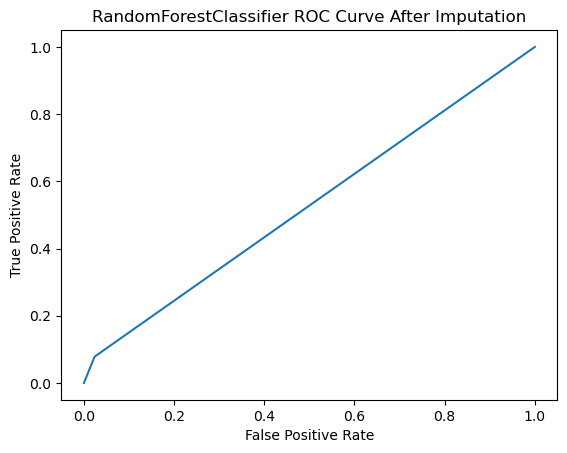

In [39]:
print(accuracy_score(y_test_frame, frame_predict))
print(classification_report(y_test_frame, frame_predict))
false_positive_rate_frame, true_positive_rate_frame, thresholds_frame = roc_curve(y_test_frame, frame_predict, pos_label = 1.0)
plt.plot(false_positive_rate_frame, true_positive_rate_frame)
plt.title("RandomForestClassifier ROC Curve After Imputation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [40]:
pki_heart_df = pd.read_csv('heart_2020_cleaned.csv')
pki_heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [42]:
pki_heart_df = pki_heart_df.replace(to_replace='No', value=0)
pki_heart_df = pki_heart_df.replace(to_replace='Yes', value=1)

In [44]:
pki_heart_df = pki_heart_df.replace(to_replace='Female', value=0)
pki_heart_df = pki_heart_df.replace(to_replace='Female', value=1)

In [45]:
pki_heart_df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [46]:
pki_heart_df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
pki_heart_df_dummies = pd.get_dummies(pki_heart_df)
pki_heart_df_dummies

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,Race_White,Diabetic_0,Diabetic_1,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,5.0,...,1,0,1,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,7.0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,8.0,...,1,0,1,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6.0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,8.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,6.0,...,0,0,1,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,5.0,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,1,6.0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12.0,...,0,1,0,0,0,0,0,1,0,0


In [49]:
pki_heart_df_dummies.isnull().sum()

HeartDisease                           0
BMI                                    0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
PhysicalHealth                         0
MentalHealth                           0
DiffWalking                            0
PhysicalActivity                       0
SleepTime                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
Sex_0                                  0
Sex_Male                               0
AgeCategory_18-24                      0
AgeCategory_25-29                      0
AgeCategory_30-34                      0
AgeCategory_35-39                      0
AgeCategory_40-44                      0
AgeCategory_45-49                      0
AgeCategory_50-54                      0
AgeCategory_55-59                      0
AgeCategory_60-64                      0
AgeCategory_65-6

In [50]:
pki_rfc = RandomForestClassifier(n_estimators=500)

In [91]:
pki_rfc = RandomForestClassifier(n_estimators=500)
X_pki = pki_heart_df_dummies.drop(columns='HeartDisease')
y_pki = pki_heart_df_dummies['HeartDisease']
X_train_pki, X_test_pki, y_train_pki, y_test_pki = train_test_split(X_pki, y_pki, test_size=.2)
pki_rfc.fit(X_train_pki, y_train_pki)
pki_rfc_predict = pki_rfc.predict(X_test_pki)
#look at what features the model says are valuable to it's predictive qualities
print("PKI Feature Importance")
sorted(zip(pki_rfc.feature_importances_, X_pki.columns), reverse=True)

PKI Feature Importance
[(0.34618234429955475, 'BMI'), (0.11083217381902047, 'SleepTime'), (0.07865162419722466, 'PhysicalHealth'), (0.06807774439049194, 'MentalHealth'), (0.028929495734490444, 'Stroke'), (0.026083536688787486, 'PhysicalActivity'), (0.024332083858969265, 'DiffWalking'), (0.02192653283857386, 'Asthma'), (0.020943652384068166, 'Smoking'), (0.017833836282824405, 'AgeCategory_80 or older'), (0.01628017814016562, 'SkinCancer'), (0.015684184621888843, 'KidneyDisease'), (0.014712696178484953, 'Diabetic_1'), (0.014499747557849085, 'GenHealth_Poor'), (0.013044140048762637, 'GenHealth_Fair'), (0.012272037123060322, 'Race_White'), (0.012069230489910687, 'AgeCategory_75-79'), (0.012052387375334678, 'AgeCategory_70-74'), (0.011641369844163427, 'Diabetic_0'), (0.010471595179983275, 'AgeCategory_65-69'), (0.00989659111891726, 'AlcoholDrinking'), (0.009483185830716591, 'AgeCategory_60-64'), (0.008858634352304998, 'Sex_Male'), (0.008810083198096012, 'Sex_0'), (0.008614193061604054, 'Gen

PKI Feature Importance


[(0.34618234429955475, 'BMI'),
 (0.11083217381902047, 'SleepTime'),
 (0.07865162419722466, 'PhysicalHealth'),
 (0.06807774439049194, 'MentalHealth'),
 (0.028929495734490444, 'Stroke'),
 (0.026083536688787486, 'PhysicalActivity'),
 (0.024332083858969265, 'DiffWalking'),
 (0.02192653283857386, 'Asthma'),
 (0.020943652384068166, 'Smoking'),
 (0.017833836282824405, 'AgeCategory_80 or older'),
 (0.01628017814016562, 'SkinCancer'),
 (0.015684184621888843, 'KidneyDisease'),
 (0.014712696178484953, 'Diabetic_1'),
 (0.014499747557849085, 'GenHealth_Poor'),
 (0.013044140048762637, 'GenHealth_Fair'),
 (0.012272037123060322, 'Race_White'),
 (0.012069230489910687, 'AgeCategory_75-79'),
 (0.012052387375334678, 'AgeCategory_70-74'),
 (0.011641369844163427, 'Diabetic_0'),
 (0.010471595179983275, 'AgeCategory_65-69'),
 (0.00989659111891726, 'AlcoholDrinking'),
 (0.009483185830716591, 'AgeCategory_60-64'),
 (0.008858634352304998, 'Sex_Male'),
 (0.008810083198096012, 'Sex_0'),
 (0.008614193061604054, 'Ge

0.9041573508028581
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58551
           1       0.32      0.12      0.18      5408

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959

AUC Score: 0.5489672847163334


Text(0, 0.5, 'True Positive Rate')

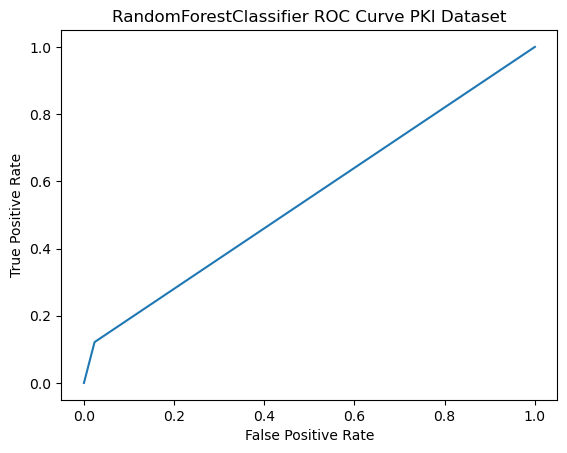

In [153]:
print(accuracy_score(y_test_pki, pki_rfc_predict))
print(classification_report(y_test_pki, pki_rfc_predict))
false_positive_rate_rfc, true_positive_rate_rfc, thresholds_rfc = roc_curve(y_test_pki, pki_rfc_predict, pos_label = 1.0)
pki_auc = roc_auc_score(y_test_pki, pki_rfc_predict)
print(f'AUC Score: {pki_auc}')
plt.plot(false_positive_rate_rfc, true_positive_rate_rfc)
plt.title("RandomForestClassifier ROC Curve PKI Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [55]:
heart_failure_df = pd.read_csv('heart_failture.csv')
heart_failure_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
heart_failure_df['Sex'] = heart_failure_df['Sex'].replace(to_replace='M', value=1)
heart_failure_df['Sex'] = heart_failure_df['Sex'].replace(to_replace='F', value=0)
heart_failure_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [60]:
heart_failure_df['ExerciseAngina'] = heart_failure_df['ExerciseAngina'].replace(to_replace='Y', value=1)
heart_failure_df['ExerciseAngina'] = heart_failure_df['ExerciseAngina'].replace(to_replace='N', value=0)

In [90]:
heart_failure_df_dummies = pd.get_dummies(heart_failure_df)
heart_failure_df_dummies

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [93]:
hf_rfc = RandomForestClassifier(n_estimators=500)
X_hf = heart_failure_df_dummies.drop(columns='HeartDisease')
y_hf = heart_failure_df_dummies['HeartDisease']
X_train_hf, X_test_hf, y_train_hf, y_test_hf = train_test_split(X_hf, y_hf, test_size=.2)
hf_rfc.fit(X_train_hf, y_train_hf)
hf_rfc_predict = hf_rfc.predict(X_test_hf)


In [94]:
#look at what features the model says are valuable to it's predictive qualities
print("Heart Failure Feature Importance")
sorted(zip(hf_rfc.feature_importances_, X_hf.columns), reverse=True)

Heart Failure Feature Importance


[(0.14116006069912482, 'ST_Slope_Up'),
 (0.1014920493213766, 'Oldpeak'),
 (0.09521532940937333, 'Cholesterol'),
 (0.09449854807358353, 'MaxHR'),
 (0.0928611477717767, 'ChestPainType_ASY'),
 (0.08855322020579585, 'ST_Slope_Flat'),
 (0.07676604414564683, 'Age'),
 (0.0718435104239191, 'ExerciseAngina'),
 (0.0702021569409724, 'RestingBP'),
 (0.03764104959636902, 'Sex'),
 (0.035744266399884844, 'ChestPainType_ATA'),
 (0.024969385160442812, 'FastingBS'),
 (0.017633386846485622, 'RestingECG_LVH'),
 (0.016242680462505692, 'ChestPainType_NAP'),
 (0.01143851836421697, 'RestingECG_Normal'),
 (0.008785934657652537, 'RestingECG_ST'),
 (0.007931490762464492, 'ST_Slope_Down'),
 (0.007021220758408896, 'ChestPainType_TA')]

0.8641304347826086
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        90
           1       0.84      0.90      0.87        94

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

AUC Score: 0.8632387706855792


Text(0, 0.5, 'True Positive Rate')

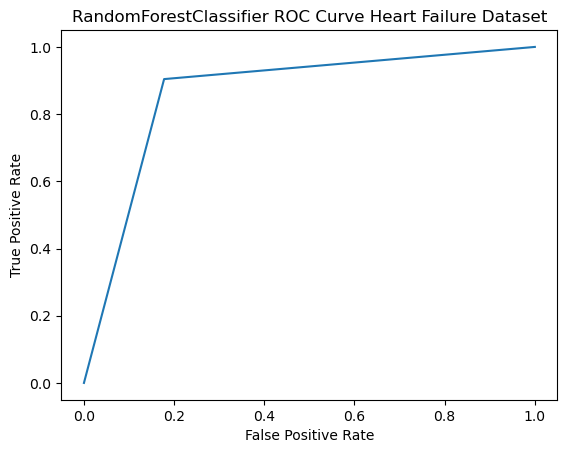

In [152]:
print(accuracy_score(y_test_hf, hf_rfc_predict))
print(classification_report(y_test_hf, hf_rfc_predict))
false_positive_rate_hf, true_positive_rate_hf, thresholds_hf = roc_curve(y_test_hf, hf_rfc_predict, pos_label = 1.0)
hf_auc = roc_auc_score(y_test_hf, hf_rfc_predict)
print(f'AUC Score: {hf_auc}')
plt.plot(false_positive_rate_hf, true_positive_rate_hf)
plt.title("RandomForestClassifier ROC Curve Heart Failure Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [96]:
heart_prediction_df = pd.read_csv('Heart_Disease_Prediction.csv')
heart_prediction_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [97]:
heart_prediction_df = heart_prediction_df.replace(to_replace='Presence', value=1)
heart_prediction_df = heart_prediction_df.replace(to_replace='Absence', value=0)
heart_prediction_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [139]:
heart_prediction_df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [98]:
hp_rfc = RandomForestClassifier(n_estimators=500)
X_hp = heart_prediction_df.drop(columns='Heart Disease')
y_hp = heart_prediction_df['Heart Disease']
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X_hp, y_hp, test_size=.2)
hp_rfc.fit(X_train_hp, y_train_hp)
hp_rfc_predict = hp_rfc.predict(X_test_hp)


In [99]:
#look at what features the model says are valuable to it's predictive qualities
print("Heart Prediction Feature Importance")
sorted(zip(hp_rfc.feature_importances_, X_hp.columns), reverse=True)

Heart Prediction Feature Importance


[(0.12790573126997817, 'ST depression'),
 (0.12426812247076476, 'Max HR'),
 (0.12186135693335429, 'Number of vessels fluro'),
 (0.11708135819307214, 'Chest pain type'),
 (0.10533101605467138, 'Thallium'),
 (0.08434193918904628, 'Age'),
 (0.08354456274815796, 'Cholesterol'),
 (0.06943761672643817, 'BP'),
 (0.05180348664033688, 'Exercise angina'),
 (0.04701460724151618, 'Slope of ST'),
 (0.03469926532214938, 'Sex'),
 (0.022183304296110987, 'EKG results'),
 (0.01052763291440345, 'FBS over 120')]

0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.89      0.70      0.78        23

    accuracy                           0.83        54
   macro avg       0.85      0.82      0.82        54
weighted avg       0.84      0.83      0.83        54

AUC Score: 0.8155680224403927


Text(0, 0.5, 'True Positive Rate')

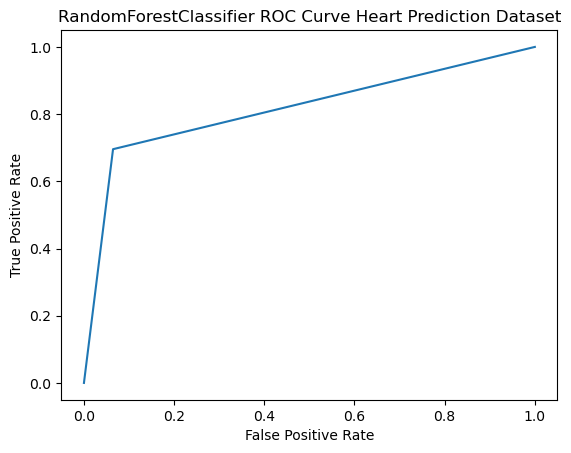

In [150]:
print(accuracy_score(y_test_hp, hp_rfc_predict))
print(classification_report(y_test_hp, hp_rfc_predict))
false_positive_rate_hp, true_positive_rate_hp, thresholds_hp = roc_curve(y_test_hp, hp_rfc_predict, pos_label = 1.0)
hp_auc = roc_auc_score(y_test_hp, hp_rfc_predict)
print(f'AUC Score: {hp_auc}')
plt.plot(false_positive_rate_hp, true_positive_rate_hp)
plt.title("RandomForestClassifier ROC Curve Heart Prediction Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [102]:
first_clean_df.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,2.0,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,2.0,3.0,88.0,88.0,NaN,1.0,2.0,2.0,1.0,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,2.0,2.0,88.0,88.0,NaN,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,2.0,2.0,88.0,10.0,88.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,5.0,30.0,88.0,30.0,3.0,1.0,2.0,1.0,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [103]:
cdc_PCA = PCA(n_components=15)

In [125]:
null_threshold = 0.05
null_percentages = first_clean_df.isnull().mean()
overly_null_columns = null_percentages[null_percentages < null_threshold].index.tolist()
print(overly_null_columns)

['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG1', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_D

In [126]:
null_reduction_cdc = first_clean_df[overly_null_columns]

In [127]:
null_reduction_cdc.shape

(438693, 99)

In [128]:
null_reduction_cdc.isnull().mean()

SEXVAR      0.000000
GENHLTH     0.000009
PHYSHLTH    0.000007
MENTHLTH    0.000005
PRIMINSR    0.000007
              ...   
_VEGLT1A    0.000000
_FRT16A     0.000000
_VEG23A     0.000000
_FRUITE1    0.000000
_VEGETE1    0.000000
Length: 99, dtype: float64

In [129]:
cdc_imputer = KNNImputer(n_neighbors=5)
imputed_df = cdc_imputer.fit_transform(null_reduction_cdc)

In [131]:
full_imputed = pd.DataFrame(imputed_df, columns=null_reduction_cdc.columns)
full_imputed.head()

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,...,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,2.0,5.0,20.0,10.0,3.0,1.0,2.0,2.0,2.0,3.0,...,5.397605e-79,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,2.0,3.0,88.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,2.0,2.0,88.0,88.0,2.0,2.0,2.0,1.0,2.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,2.0,2.0,88.0,10.0,2.0,1.0,2.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,5.0,30.0,88.0,3.0,1.0,2.0,1.0,1.0,4.0,...,5.397605e-79,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [132]:
full_imputed.isnull().mean()

SEXVAR      0.0
GENHLTH     0.0
PHYSHLTH    0.0
MENTHLTH    0.0
PRIMINSR    0.0
           ... 
_VEGLT1A    0.0
_FRT16A     0.0
_VEG23A     0.0
_FRUITE1    0.0
_VEGETE1    0.0
Length: 99, dtype: float64

In [140]:
for x in full_imputed.columns:
    full_imputed[x] = full_imputed[x].astype('int')

In [141]:
full_imputed.dtypes

SEXVAR      int32
GENHLTH     int32
PHYSHLTH    int32
MENTHLTH    int32
PRIMINSR    int32
            ...  
_VEGLT1A    int32
_FRT16A     int32
_VEG23A     int32
_FRUITE1    int32
_VEGETE1    int32
Length: 99, dtype: object

In [142]:
cdc_fi_rfc = RandomForestClassifier(n_estimators=500)
X_fi = full_imputed.drop(columns='_MICHD')
y_fi = full_imputed['_MICHD']
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi, y_fi, test_size=.2)
cdc_fi_rfc.fit(X_train_fi, y_train_fi)
fi_rfc_predict = cdc_fi_rfc.predict(X_test_fi)

In [145]:
print("CDC Data KNNImputed Feature Importance")
sorted(zip(cdc_fi_rfc.feature_importances_[:10], X_fi.columns), reverse=True)

CDC Data KNNImputed Feature Importance


[(0.011628731190211824, 'GENHLTH'),
 (0.006469541679957532, 'BPHIGH6'),
 (0.004018509836046351, 'PHYSHLTH'),
 (0.003250975996072805, 'PRIMINSR'),
 (0.0028864334362935676, 'MENTHLTH'),
 (0.002491453255356128, 'PERSDOC3'),
 (0.0019279408516561746, 'SEXVAR'),
 (0.0013298760423846065, 'CHECKUP1'),
 (0.0012375724777387203, 'EXERANY2'),
 (0.0008738967838717606, 'MEDCOST1')]

0.9959197164316894
              precision    recall  f1-score   support

           1       1.00      0.95      0.98      7451
           2       1.00      1.00      1.00     80288

    accuracy                           1.00     87739
   macro avg       1.00      0.98      0.99     87739
weighted avg       1.00      1.00      1.00     87739

AUC Score: 0.9759763790095289


Text(0, 0.5, 'True Positive Rate')

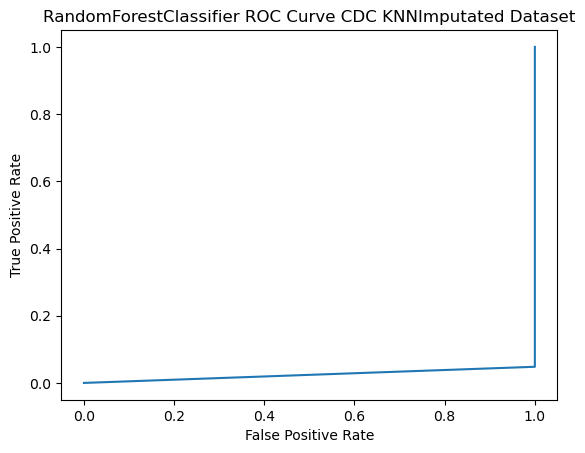

In [149]:
print(accuracy_score(y_test_fi, fi_rfc_predict))
print(classification_report(y_test_fi, fi_rfc_predict))
false_positive_rate_hp, true_positive_rate_hp, thresholds_hp = roc_curve(y_test_fi, fi_rfc_predict, pos_label = 1.0)
fi_auc = roc_auc_score(y_test_fi, fi_rfc_predict)
print(f'AUC Score: {fi_auc}')
plt.plot(false_positive_rate_hp, true_positive_rate_hp)
plt.title("RandomForestClassifier ROC Curve CDC KNNImputated Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")